## Example 1 : 강남 3구는 안전한가?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import numpy as np
from matplotlib import font_manager as fm

fm.get_fontconfig_fonts()
font_location = "c:/windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [2]:
# 서울시 CCTV 데이터
CCTV_Seoul = pd.read_csv('./data/CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별',
                          CCTV_Seoul.columns[1] : 'CCTV수',}, inplace=True)
CCTV_Seoul.head()

,구별,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [3]:
# 어느 구에 가장 CCTV가 많은가?
CCTV_Seoul.sort_values(by='CCTV수', ascending=False).head(5)

,구별,CCTV수,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


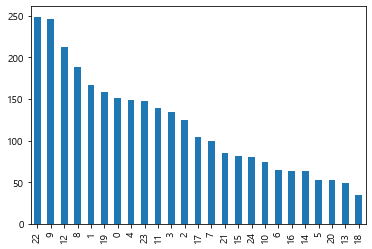

In [4]:
# 최근 3년간 CCTV 증가율이 가장 높은 구는?
CCTV_Seoul['CCTV최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100

# Sorted
CCTV_Seoul.sort_values(by = 'CCTV최근증가율', ascending=False)['CCTV최근증가율'].plot.bar()

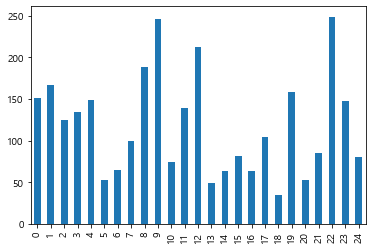

In [5]:
# Not Sorted
CCTV_Seoul['CCTV최근증가율'].plot.bar()

In [7]:
# 서울시 인구 데이터
pop_Seoul = pd.read_excel('./data/population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N')
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()
pop_Seoul.drop(0, inplace = True)

In [8]:
# 외국인 비율, 고령자 비율 추가
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100

In [9]:
# 인구수가 가장 많은 구는?
pop_Seoul.sort_values(by = '인구수', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483,660584,6899,72506,1.033584,10.862599
16,강서구,603772,597248,6524,72548,1.080540,12.015794
23,강남구,570500,565550,4950,63167,0.867660,11.072217
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291
12,은평구,494388,489943,4445,72334,0.899091,14.631019
15,양천구,479978,475949,4029,52975,0.839413,11.036964
8,성북구,461260,449773,11487,64692,2.490353,14.025062
25,강동구,453233,449019,4214,54622,0.929765,12.051638
22,서초구,450310,445994,4316,51733,0.958451,11.488308


In [10]:
# 외국인이 가장 많은 구는? 가장 외국인 비율이 높은 구는?
pop_Seoul.sort_values(by = '외국인', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
17,구로구,447874,416487,31387,56833,7.007998,12.689506
18,금천구,255082,236353,18729,32970,7.342345,12.925255
21,관악구,525515,507203,18312,68082,3.484582,12.955291
6,동대문구,369496,354079,15417,54173,4.172440,14.661322
5,광진구,372164,357211,14953,42214,4.017852,11.342849
3,용산구,244203,229456,14747,36231,6.038828,14.836427
13,서대문구,327163,314982,12181,48161,3.723221,14.720797
20,동작구,412520,400456,12064,56013,2.924464,13.578251
8,성북구,461260,449773,11487,64692,2.490353,14.025062


In [11]:
pop_Seoul.sort_values(by = '외국인비율', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985,368072,34913,52413,8.663598,13.006191
18,금천구,255082,236353,18729,32970,7.342345,12.925255
17,구로구,447874,416487,31387,56833,7.007998,12.689506
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
1,종로구,162820,153589,9231,25425,5.669451,15.615404
6,동대문구,369496,354079,15417,54173,4.172440,14.661322
5,광진구,372164,357211,14953,42214,4.017852,11.342849
13,서대문구,327163,314982,12181,48161,3.723221,14.720797
21,관악구,525515,507203,18312,68082,3.484582,12.955291


In [12]:
# 고령자에 대해서는?
pop_Seoul.sort_values(by = '고령자', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772,597248,6524,72548,1.080540,12.015794
24,송파구,667483,660584,6899,72506,1.033584,10.862599
12,은평구,494388,489943,4445,72334,0.899091,14.631019
11,노원구,569384,565565,3819,71941,0.670725,12.634883
21,관악구,525515,507203,18312,68082,3.484582,12.955291
8,성북구,461260,449773,11487,64692,2.490353,14.025062
23,강남구,570500,565550,4950,63167,0.867660,11.072217
17,구로구,447874,416487,31387,56833,7.007998,12.689506
7,중랑구,414503,409882,4621,56774,1.114829,13.696885
20,동작구,412520,400456,12064,56013,2.924464,13.578251


In [13]:
pop_Seoul.sort_values(by = '고령자비율', ascending = False)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192,326686,3506,54813,1.061806,16.600342
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
13,서대문구,327163,314982,12181,48161,3.723221,14.720797
10,도봉구,348646,346629,2017,51312,0.578524,14.717507
6,동대문구,369496,354079,15417,54173,4.172440,14.661322
12,은평구,494388,489943,4445,72334,0.899091,14.631019
8,성북구,461260,449773,11487,64692,2.490353,14.025062
7,중랑구,414503,409882,4621,56774,1.114829,13.696885


In [15]:
# CCTV 데이터와 인구 데이터 합치기
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.drop(data_result.columns[2:6],axis=1, inplace=True)

data_result.set_index('구별', inplace=True)
data_result.head()

,CCTV수,CCTV최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500,565550,4950,63167,0.867660,11.072217
강동구,773,166.490765,453233,449019,4214,54622,0.929765,12.051638
강북구,748,125.203252,330192,326686,3506,54813,1.061806,16.600342
강서구,884,134.793814,603772,597248,6524,72548,1.080540,12.015794
관악구,1496,149.290780,525515,507203,18312,68082,3.484582,12.955291


In [14]:
CCTV_Seoul

,구별,CCTV수,2013년도 이전,2014년,2015년,2016년,CCTV최근증가율
0,강남구,2780,1292,430,584,932,150.619195
1,강동구,773,379,99,155,377,166.490765
2,강북구,748,369,120,138,204,125.203252
3,강서구,884,388,258,184,81,134.793814
4,관악구,1496,846,260,390,613,149.290780
5,광진구,707,573,78,53,174,53.228621
6,구로구,1561,1142,173,246,323,64.973730
7,금천구,1015,674,51,269,354,100.000000
8,노원구,1265,542,57,451,516,188.929889
9,도봉구,485,238,159,42,386,246.638655


In [16]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
4,성동구,311244,303380,7864,39997,2.526635,12.850689
5,광진구,372164,357211,14953,42214,4.017852,11.342849
6,동대문구,369496,354079,15417,54173,4.172440,14.661322
7,중랑구,414503,409882,4621,56774,1.114829,13.696885
8,성북구,461260,449773,11487,64692,2.490353,14.025062
9,강북구,330192,326686,3506,54813,1.061806,16.600342
10,도봉구,348646,346629,2017,51312,0.578524,14.717507


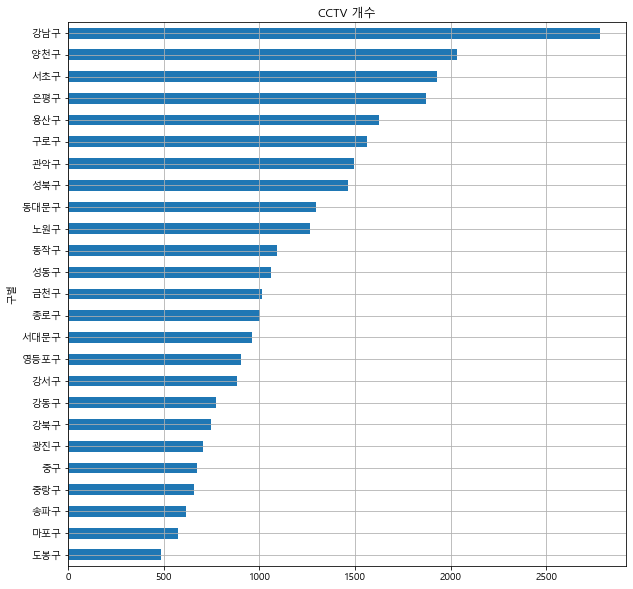

In [17]:
data_result['CCTV수'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.title('CCTV 개수')
plt.show()

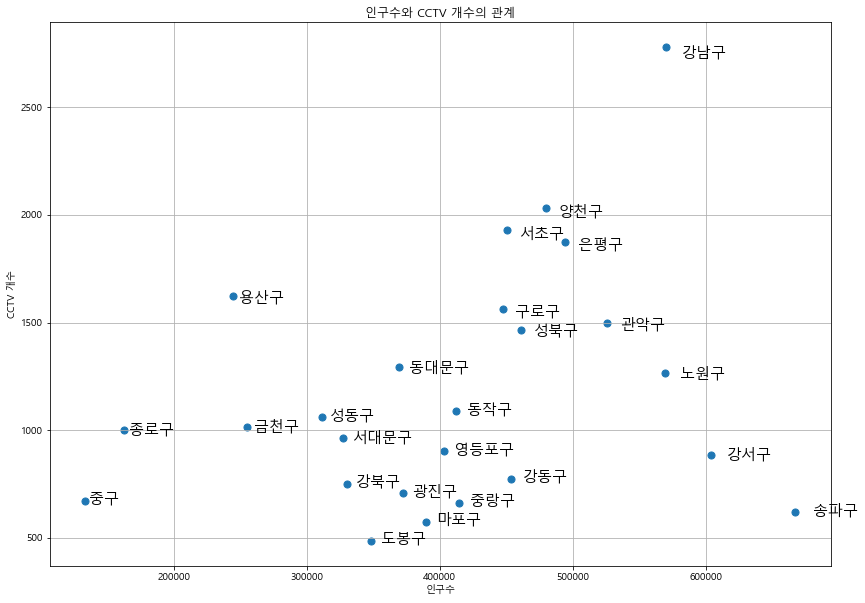

In [18]:
plt.figure(figsize=(14,10))
plt.title('인구수와 CCTV 개수의 관계')
plt.scatter(data_result['인구수'], data_result['CCTV수'],  s=50)


for n in range(data_result.shape[0]):
    plt.text(data_result['인구수'][n]*1.02, data_result['CCTV수'][n]*0.98, 
             data_result.index[n], fontsize=15)

plt.xlabel('인구수')
plt.ylabel('CCTV 개수')
plt.grid()
plt.show()

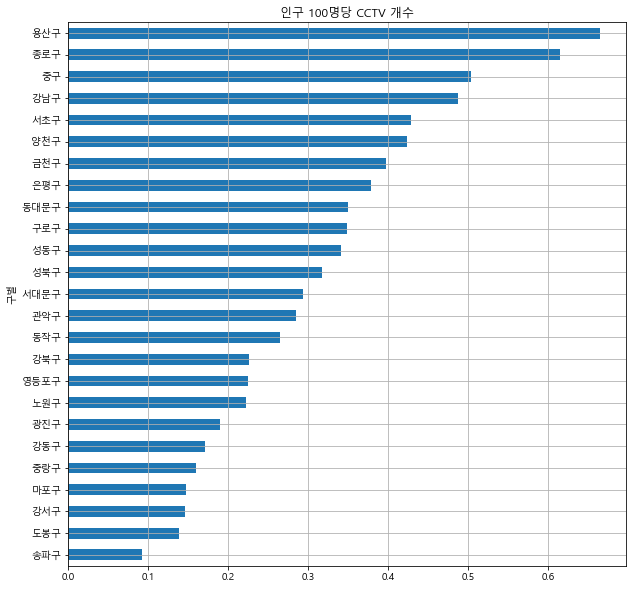

In [19]:
# 인구수 100명당 CCTV수가 가장 많은 구는?
data_result['CCTV비율'] = data_result['CCTV수'] / data_result['인구수'] * 100

# bar graph
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.title('인구 100명당 CCTV 개수')
plt.show()

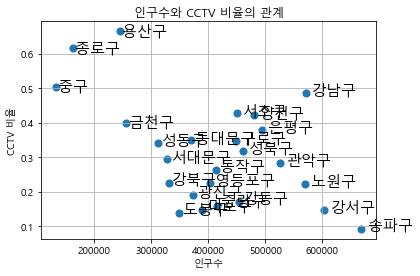

In [20]:
plt.scatter(data_result['인구수'], data_result['CCTV비율'],  s=50)

for n in range(data_result.shape[0]):
    plt.text(data_result['인구수'][n]*1.02, data_result['CCTV비율'][n]*0.98, 
             data_result.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('CCTV 비율')
plt.title('인구수와 CCTV 비율의 관계')
plt.grid()
plt.show()

In [21]:
# 범죄 데이터
crime_anal_raw = pd.read_csv('./data/crime_in_Seoul_include_gu_name.csv', 
                             encoding='utf-8', index_col=0)
crime_anal_raw.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,구별
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,중구
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,종로구
2,남대문서,1,0,6,4,65,46,1153,382,869,794,중구
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,서대문구
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,종로구


In [22]:
crime_anal_raw.구별.value_counts()

중구      2
성북구     2
서초구     2
양천구     2
강남구     2
은평구     2
종로구     2
중랑구     1
노원구     1
송파구     1
구로구     1
강동구     1
관악구     1
강북구     1
금천구     1
광진구     1
동작구     1
성동구     1
영등포구    1
마포구     1
동대문구    1
용산구     1
서대문구    1
도봉구     1
Name: 구별, dtype: int64

In [24]:
# 구별로 범죄 건수 합산
crime_anal = pd.pivot_table(crime_anal_raw, index='구별', aggfunc=np.sum)
crime_anal

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
구별,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284
강동구,123,156,8,6,3,4,789,2366,2248,2712
강북구,126,153,13,14,8,7,618,1434,2348,2649
관악구,221,320,14,12,8,9,827,2706,2642,3298
광진구,220,240,26,14,4,4,1277,3026,2180,2625
구로구,164,281,11,15,6,8,889,2335,2432,3007
금천구,122,151,6,6,4,3,888,1567,1776,2054
노원구,121,197,7,7,10,10,801,2193,2329,2723
도봉구,106,102,10,9,3,3,478,1063,1303,1487


In [25]:
crime_anal.rename(columns = {'강간 발생':'강간', 
                             '강도 발생':'강도', 
                             '살인 발생':'살인', 
                             '절도 발생':'절도', 
                             '폭력 발생':'폭력'}, inplace=True)

In [26]:
# 총 범죄 건수 추가
col = ['강간', '강도', '살인', '절도', '폭력']
col2 = [x + ' 검거' for x in col]
crime_anal['범죄'] = np.sum(crime_anal[col], axis=1)
crime_anal['범죄 검거'] = np.sum(crime_anal[col2], axis=1)

In [27]:
crime_anal.head()

,강간 검거,강간,강도 검거,강도,살인 검거,살인,절도 검거,절도,폭력 검거,폭력,범죄,범죄 검거
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,1650,3850,3705,4284,8617,5732
강동구,123,156,8,6,3,4,789,2366,2248,2712,5244,3171
강북구,126,153,13,14,8,7,618,1434,2348,2649,4257,3113
관악구,221,320,14,12,8,9,827,2706,2642,3298,6345,3712
광진구,220,240,26,14,4,4,1277,3026,2180,2625,5909,3707


In [28]:
# 검거율 계산
col.append('범죄')
for x in col:
    crime_anal[x+'검거율'] = crime_anal[x+' 검거']/crime_anal[x]*100

In [29]:
col2.append('범죄 검거')
crime_anal.drop(col2, axis=1, inplace=True)

In [30]:
## 검거율이 100 이상인 값을 100으로 수정
con_list = [x +'검거율' for x in col]
for column in con_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

In [31]:
crime_anal.head()

,강간,강도,살인,절도,폭력,범죄,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄검거율
구별,,,,,,,,,,,,
강남구,449,21,13,3850,4284,8617,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,2366,2712,5244,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,1434,2649,4257,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615
관악구,320,12,9,2706,3298,6345,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758
광진구,240,14,4,3026,2625,5909,91.666667,100.000000,100.000000,42.200925,83.047619,62.734811


In [32]:
# CCTV 인구 데이터와 결합
data_result = pd.merge(crime_anal, data_result, left_index=True, right_index=True)

In [33]:
# 인구 1만명 당 범죄발생 건수 계산
for x in col:
    data_result[x+'율'] = data_result[x]/data_result['인구수']*10000
data_result

,강간,강도,살인,절도,폭력,범죄,강간검거율,강도검거율,살인검거율,절도검거율,...,고령자,외국인비율,고령자비율,CCTV비율,강간율,강도율,살인율,절도율,폭력율,범죄율
구별,,,,,,,,,,,,,,,,,,,,,
강남구,449,21,13,3850,4284,8617,77.728285,85.714286,76.923077,42.857143,...,63167,0.867660,11.072217,0.487292,7.870289,0.368098,0.227870,67.484663,75.092025,151.042945
강동구,156,6,4,2366,2712,5244,78.846154,100.000000,75.000000,33.347422,...,54622,0.929765,12.051638,0.170552,3.441938,0.132382,0.088255,52.202730,59.836773,115.702078
강북구,153,14,7,1434,2649,4257,82.352941,92.857143,100.000000,43.096234,...,54813,1.061806,16.600342,0.226535,4.633668,0.423996,0.211998,43.429278,80.226050,128.924989
관악구,320,12,9,2706,3298,6345,69.062500,100.000000,88.888889,30.561715,...,68082,3.484582,12.955291,0.284673,6.089265,0.228347,0.171261,51.492346,62.757486,120.738704
광진구,240,14,4,3026,2625,5909,91.666667,100.000000,100.000000,42.200925,...,42214,4.017852,11.342849,0.189970,6.448770,0.376178,0.107479,81.308240,70.533421,158.774089
구로구,281,15,8,2335,3007,5646,58.362989,73.333333,75.000000,38.072805,...,56833,7.007998,12.689506,0.348536,6.274086,0.334916,0.178622,52.135199,67.139419,126.062241
금천구,151,6,3,1567,2054,3781,80.794702,100.000000,100.000000,56.668794,...,32970,7.342345,12.925255,0.397911,5.919665,0.235218,0.117609,61.431226,80.523126,148.226845
노원구,197,7,10,2193,2723,5130,61.421320,100.000000,100.000000,36.525308,...,71941,0.670725,12.634883,0.222170,3.459879,0.122940,0.175628,38.515308,47.823613,90.097368
도봉구,102,9,3,1063,1487,2664,100.000000,100.000000,100.000000,44.967074,...,51312,0.578524,14.717507,0.139110,2.925604,0.258141,0.086047,30.489379,42.650712,76.409883


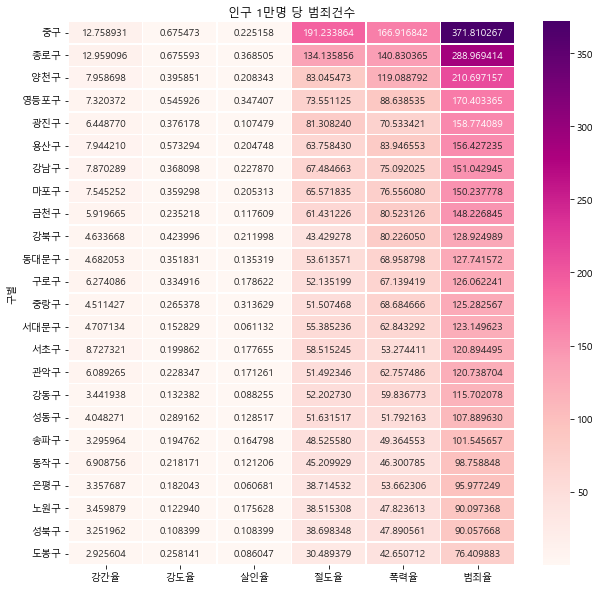

In [34]:
col_target = [x+'율' for x in col]

plt.figure(figsize = (10,10))
sns.heatmap(data_result.sort_values(by="범죄율",ascending=False)[col_target], 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('인구 1만명 당 범죄건수')
plt.show()

In [35]:
# 상대적 비교를 위한 변수 표준화
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data_result)
data_result_norm = pd.DataFrame(x_scaled, 
                                columns = data_result.columns, 
                                index = data_result.index)

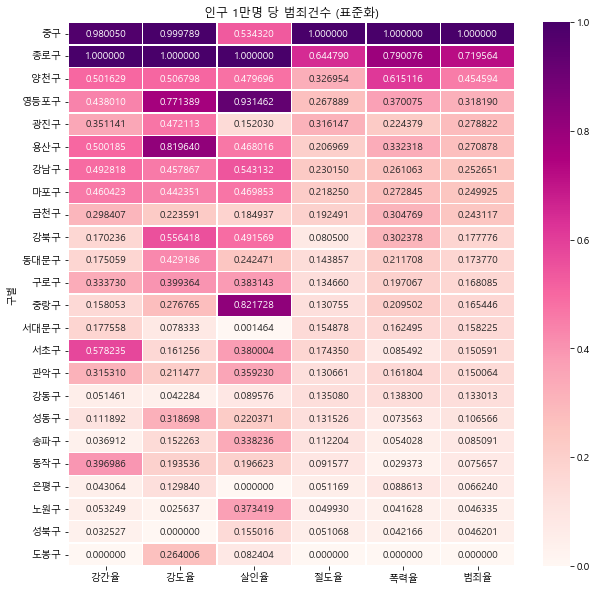

In [36]:
# 어느 구가 상대적으로 범죄율이 높은가?
col_target = [x+'율' for x in col]

plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm.sort_values(by="범죄율",ascending=False)[col_target], 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('인구 1만명 당 범죄건수 (표준화)')
plt.show()

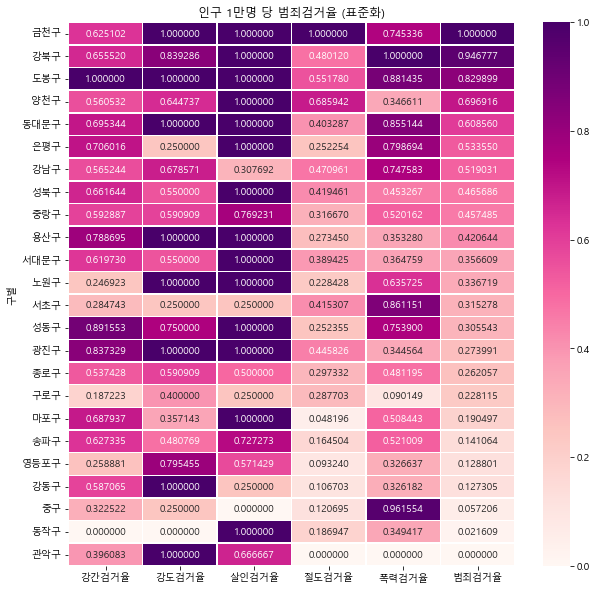

In [37]:
# 어느 구가 상대적으로 범죄검거율이 높은가?
col_target = [x+'검거율' for x in col]

plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm.sort_values(by="범죄검거율",ascending=False)[col_target], 
            annot=True, fmt='f', linewidths=.5,
                       cmap='RdPu')
plt.title('인구 1만명 당 범죄검거율 (표준화)')
plt.show()

In [38]:
data_result_norm.columns

Index(['강간', '강도', '살인', '절도', '폭력', '범죄', '강간검거율', '강도검거율', '살인검거율', '절도검거율',
       '폭력검거율', '범죄검거율', 'CCTV수', 'CCTV최근증가율', '인구수', '한국인', '외국인', '고령자',
       '외국인비율', '고령자비율', 'CCTV비율', '강간율', '강도율', '살인율', '절도율', '폭력율', '범죄율'],
      dtype='object')

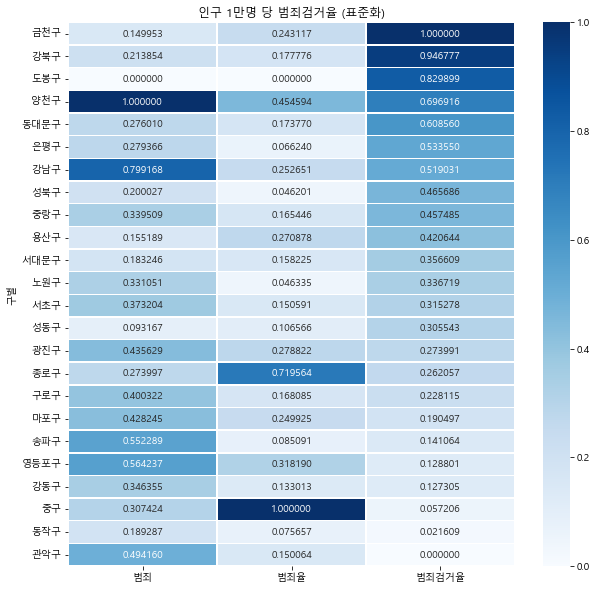

In [39]:
plt.figure(figsize = (10,10))
sns.heatmap(data_result_norm.sort_values(by="범죄검거율",ascending=False)[['범죄','범죄율','범죄검거율']], 
            annot=True, fmt='f', linewidths=.5,
                       cmap='Blues')
plt.title('인구 1만명 당 범죄검거율 (표준화)')
plt.show()

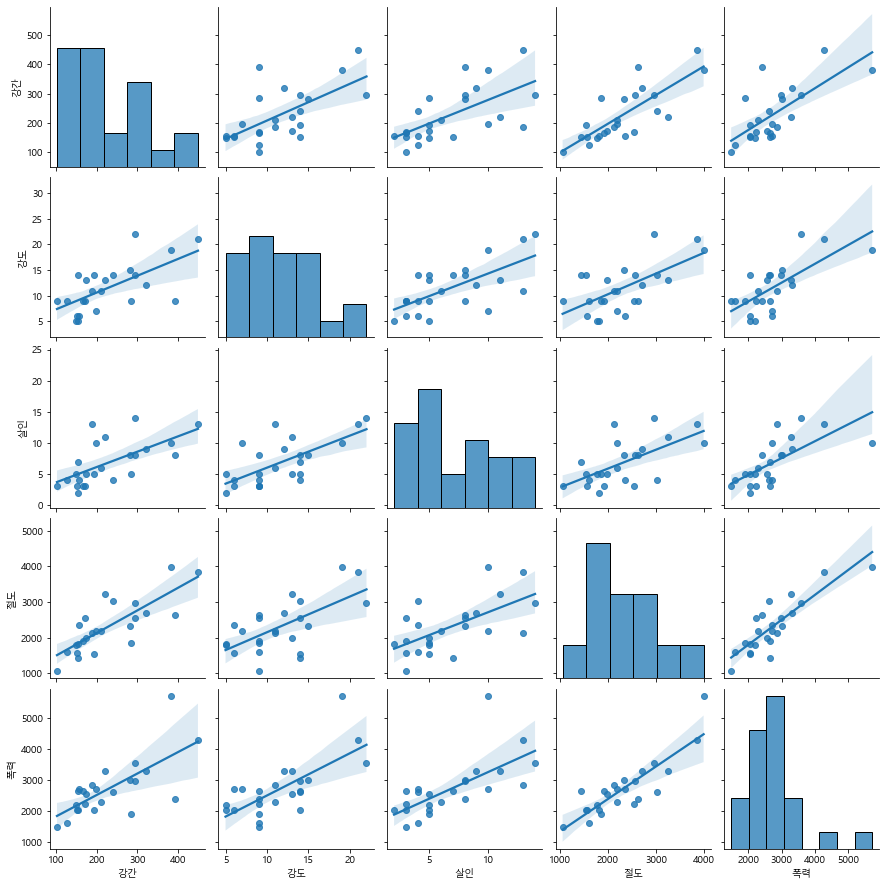

In [40]:
# 범죄 발생 건수 간의 상관관계
sns.pairplot(data_result, vars=col[:5], kind='reg')
plt.show()

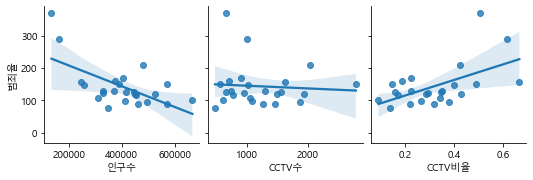

In [41]:
# 범죄 발생과 인구수, CCTV 수와의 상관관계
sns.pairplot(data_result, x_vars=["인구수","CCTV수","CCTV비율"], 
             y_vars='범죄율', kind='reg')
plt.show()

In [42]:
# 범죄발생율, 범죄검거율과 인구, CCTV 비율, 외국인비율 등의 관계는 어떠한가? 강남 3구가 안전하다고 할 수 있는가?
data_result.iloc[:,1:6].corr()

,강도,살인,절도,폭력,범죄
강도,1.000000,0.672924,0.638321,0.707703,0.708768
살인,0.672924,1.000000,0.624492,0.681428,0.687414
절도,0.638321,0.624492,1.000000,0.857572,0.958132
폭력,0.707703,0.681428,0.857572,1.000000,0.967843
범죄,0.708768,0.687414,0.958132,0.967843,1.000000


In [43]:
import folium
import json
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
print(folium.__version__)

0.12.1.post1


In [44]:
data_result_norm

,강간,강도,살인,절도,폭력,범죄,강간검거율,강도검거율,살인검거율,절도검거율,...,고령자,외국인비율,고령자비율,CCTV비율,강간율,강도율,살인율,절도율,폭력율,범죄율
구별,,,,,,,,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,0.953472,0.661386,0.799168,0.565244,0.678571,0.307692,0.470961,...,0.819508,0.035762,0.036533,0.689521,0.492818,0.457867,0.543132,0.230150,0.261063,0.252651
강동구,0.155620,0.058824,0.166667,0.445775,0.289667,0.346355,0.587065,1.000000,0.250000,0.106703,...,0.654362,0.043443,0.207231,0.136201,0.051461,0.042284,0.089576,0.135080,0.138300,0.133013
강북구,0.146974,0.529412,0.416667,0.126924,0.274769,0.213854,0.655520,0.839286,1.000000,0.480120,...,0.658053,0.059775,1.000000,0.233998,0.170236,0.556418,0.491569,0.080500,0.302378,0.177776
관악구,0.628242,0.411765,0.583333,0.562094,0.428234,0.494160,0.396083,1.000000,0.666667,0.000000,...,0.914499,0.359435,0.364724,0.335561,0.315310,0.211477,0.359230,0.130661,0.161804,0.150064
광진구,0.397695,0.529412,0.166667,0.671570,0.269094,0.435629,0.837329,1.000000,1.000000,0.445826,...,0.414557,0.425392,0.083700,0.170122,0.351141,0.472113,0.152030,0.316147,0.224379,0.278822
구로구,0.515850,0.588235,0.500000,0.435169,0.359423,0.400322,0.187223,0.400000,0.250000,0.287703,...,0.697093,0.795228,0.318402,0.447124,0.333730,0.399364,0.383143,0.134660,0.197067,0.168085
금천구,0.141210,0.058824,0.083333,0.172426,0.134074,0.149953,0.625102,1.000000,1.000000,1.000000,...,0.235901,0.836581,0.359489,0.533380,0.298407,0.223591,0.184937,0.192491,0.304769,0.243117
노원구,0.273775,0.117647,0.666667,0.386589,0.292268,0.331051,0.246923,1.000000,1.000000,0.228428,...,0.989080,0.011404,0.308882,0.226373,0.053249,0.025637,0.373419,0.049930,0.041628,0.046335
도봉구,0.000000,0.235294,0.083333,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.551780,...,0.590391,0.000000,0.671851,0.081272,0.000000,0.264006,0.082404,0.000000,0.000000,0.000000


In [45]:
data_result_norm_1 = data_result_norm.reset_index()

In [46]:
pop_Seoul

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820,153589,9231,25425,5.669451,15.615404
2,중구,133240,124312,8928,20764,6.700690,15.583909
3,용산구,244203,229456,14747,36231,6.038828,14.836427
4,성동구,311244,303380,7864,39997,2.526635,12.850689
5,광진구,372164,357211,14953,42214,4.017852,11.342849
6,동대문구,369496,354079,15417,54173,4.172440,14.661322
7,중랑구,414503,409882,4621,56774,1.114829,13.696885
8,성북구,461260,449773,11487,64692,2.490353,14.025062
9,강북구,330192,326686,3506,54813,1.061806,16.600342
10,도봉구,348646,346629,2017,51312,0.578524,14.717507


In [47]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [48]:
m = folium.Map(location=[37.562225, 126.978555], tiles="OpenStreetMap", zoom_start=11)
m.choropleth(geo_data = state_geo,
               data = pop_Seoul,
               columns = ['구별', '외국인비율'],
               fill_color = 'PuRd',
               key_on = 'feature.properties.name',
                
               )

m

c:\Users\lucky\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Example 2 : 지하철 승하차

In [55]:
import plotly.express as px
matplotlib.rcParams['axes.unicode_minus'] = False

subway_raw = pd.read_csv('./data/subwaytime.csv', encoding='cp949')
subway_raw.head()

,사용월,호선명,역ID,지하철역,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,...,승차_23,하차_23,승차_00,하차_00,승차_01,하차_01,승차_02,하차_02,승차_03,하차_03
0,Jan.19,1호선,150,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
1,Jan.19,1호선,151,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0
2,Jan.19,1호선,152,종각,100,8,4409,5105,4593,26969,...,54264,5560,4886,1722,0,0,0,0,0,0
3,Jan.19,1호선,153,종로3가,122,4,5061,2520,3876,12832,...,25970,5503,3214,2471,0,52,0,0,0,0
4,Jan.19,1호선,154,종로5가,43,2,1934,3590,2935,14991,...,12013,3450,785,980,1,3,0,0,0,0


In [56]:
subway_raw.columns

Index(['사용월', '호선명', '역ID', '지하철역', '승차_04', '하차_04', '승차_05', '하차_05',
       '승차_06', '하차_06', '승차_07', '하차_07', '승차_08', '하차_08', '승차_09', '하차_09',
       '승차_10', '하차_10', '승차_11', '하차_11', '승차_12', '하차_12', '승차_13', '하차_13',
       '승차_14', '하차_14', '승차_15', '하차_15', '승차_16', '하차_16', '승차_17', '하차_17',
       '승차_18', '하차_18', '승차_19', '하차_19', '승차_20', '하차_20', '승차_21', '하차_21',
       '승차_22', '하차_22', '승차_23', '하차_23', '승차_00', '하차_00', '승차_01', '하차_01',
       '승차_02', '하차_02', '승차_03', '하차_03'],
      dtype='object')

In [57]:
subway_raw.사용월.value_counts()

Jan.19    598
Name: 사용월, dtype: int64

In [58]:
subway_raw.지하철역.value_counts()

서울역          6
공덕           4
김포공항         4
홍대입구         4
동대문역사문화공원    3
            ..
상록수          1
반월           1
대야미          1
산본           1
정릉           1
Name: 지하철역, Length: 509, dtype: int64

In [59]:
subway = subway_raw.groupby(['지하철역']).sum()

In [60]:
subway.head()

,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,승차_08,...,승차_23,하차_23,승차_00,하차_00,승차_01,하차_01,승차_02,하차_02,승차_03,하차_03
지하철역,,,,,,,,,,,,,,,,,,,,,
4.19민주묘지,4703,22,8,1392,321,2915,850,7188,1380,8516,...,559,2541,120,759,0,7,0,0,0,0
가능,1907,200,4,7875,1103,12850,4598,26295,4387,24915,...,1857,7734,124,1763,0,0,0,0,0,0
가락시장,3158,41,0,5210,2629,11937,11184,31942,22435,42870,...,9607,14793,1564,5020,2,694,0,0,0,0
가산디지털단지,4450,1772,10,15938,6972,17546,31710,35519,146273,40296,...,28957,15648,2754,4056,0,0,0,0,0,0
가양,4107,50,0,13631,1466,25819,8259,78872,22460,85741,...,4669,26437,797,8615,4,281,0,0,0,0


In [61]:
subway.shape

(509, 49)

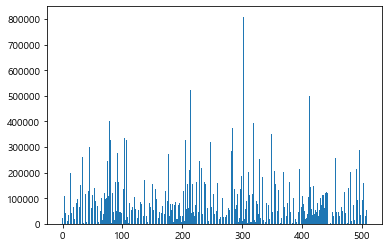

In [62]:
# 아침 7시 - 9시의 승차인원이 가장 많은 역은 어딜까?
subway['승차_출근시간']= subway[['승차_07', '승차_08', '승차_09']].sum(axis=1)
plt.bar(np.arange(subway.shape[0]),subway.승차_출근시간 )
plt.show()

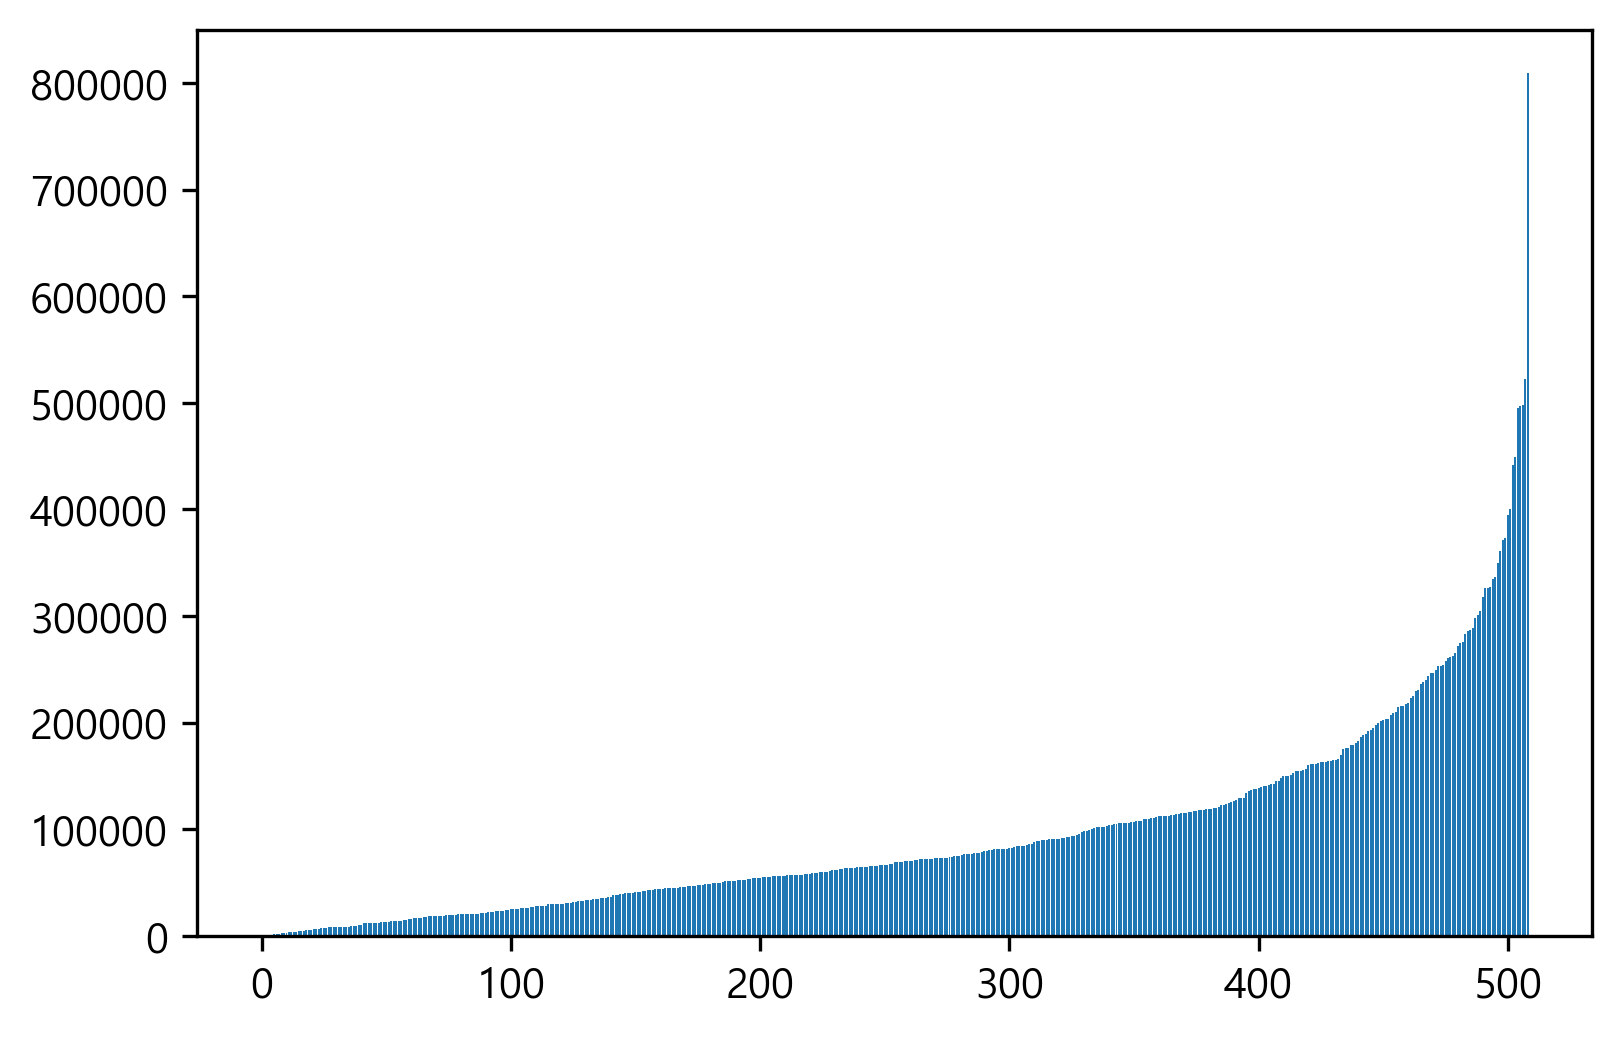

In [63]:
plt.figure(dpi = 300)
plt.bar(np.arange(subway.shape[0]),subway.승차_출근시간.sort_values() )
plt.show()

In [64]:
subway[subway.승차_출근시간 == subway.승차_출근시간.max()]

,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,승차_08,...,하차_23,승차_00,하차_00,승차_01,하차_01,승차_02,하차_02,승차_03,하차_03,승차_출근시간
지하철역,,,,,,,,,,,,,,,,,,,,,
신림,230,338,24,41291,5773,80407,23284,243083,34120,355172,...,109651,6406,35670,13,711,0,0,0,0,809541


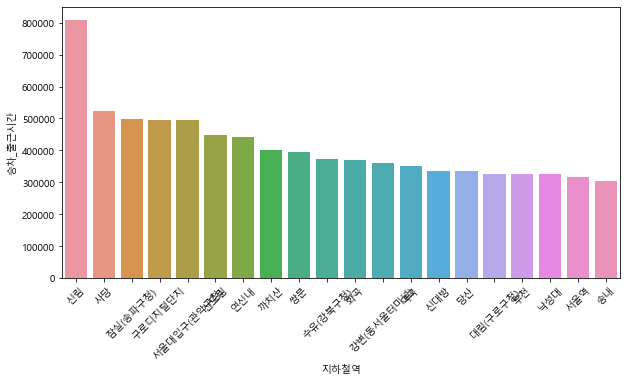

In [65]:
data_sort = subway.sort_values(by="승차_출근시간", ascending=False)[:20]

plt.figure(figsize=(10,5))
sns.barplot(x=data_sort.index, y='승차_출근시간', data=data_sort)
plt.xticks(rotation=45)
plt.show()

In [66]:
# 출근 시간대에 가장 사람들이 많이 내리는 역은 어디인가?
subway['하차_출근시간']= subway[['하차_07', '하차_08', '하차_09']].sum(axis=1)

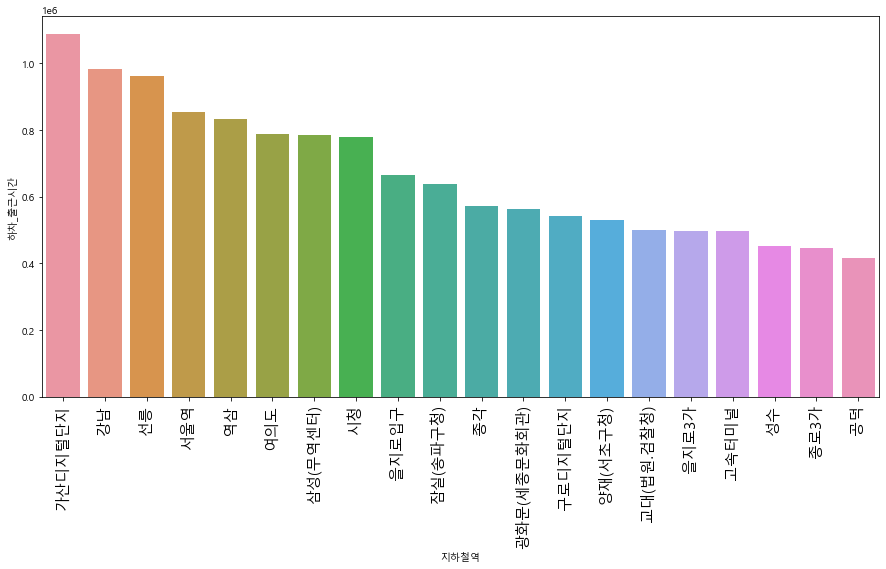

In [67]:
data_sort = subway.sort_values(by = "하차_출근시간", ascending = False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x=data_sort.index, y = '하차_출근시간', data= data_sort)
plt.xticks(rotation=90, fontsize =15)

plt.show()

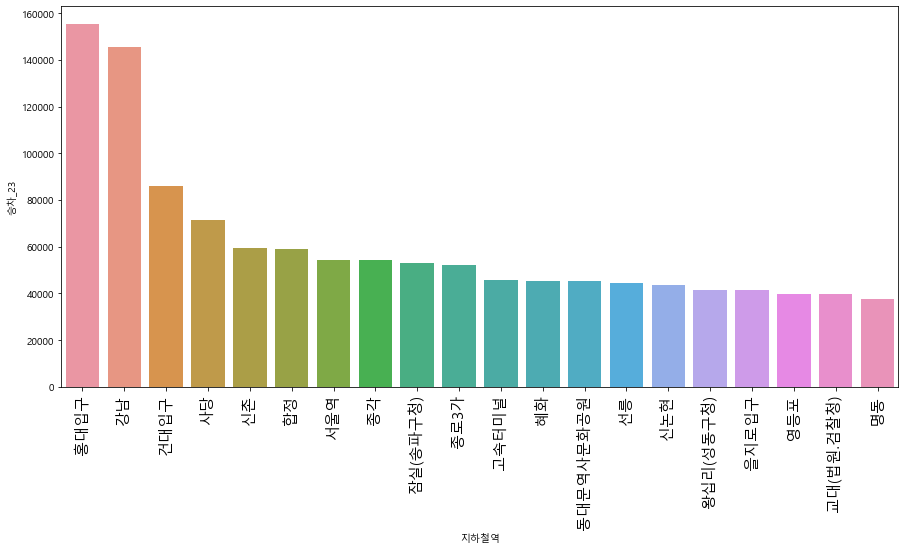

In [68]:
# 밤 11시대에 가장 사람들이 많이 타는 역은 어디인가?
data_sort = subway.sort_values(by = "승차_23", ascending = False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x=data_sort.index, y = '승차_23', data= data_sort)
plt.xticks(rotation=90, fontsize =15)

plt.show()

In [69]:
# 총 승차인원이 가장 많은 역은 어디인가? 총 하차인원이 가장 많은 역은 어디인가?
in_list = [i for i in subway.columns[:-2] if "승차" in i ]
out_list = [i for i in subway.columns[:-2] if "하차" in i ]

In [72]:
subway.columns

Index(['역ID', '승차_04', '하차_04', '승차_05', '하차_05', '승차_06', '하차_06', '승차_07',
       '하차_07', '승차_08', '하차_08', '승차_09', '하차_09', '승차_10', '하차_10', '승차_11',
       '하차_11', '승차_12', '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15',
       '하차_15', '승차_16', '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19',
       '하차_19', '승차_20', '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23',
       '하차_23', '승차_00', '하차_00', '승차_01', '하차_01', '승차_02', '하차_02', '승차_03',
       '하차_03', '승차_출근시간', '하차_출근시간'],
      dtype='object')

In [71]:
# other method
subway.columns[:-2].str.contains("승차")

array([False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False])

In [73]:
subway_in = subway.loc[:, subway.columns.str.contains("승차")]
subway_out = subway.loc[:, subway.columns.str.contains("하차")]

In [74]:
subway['총승차']= subway[in_list].sum(axis=1)
subway['총하차']= subway[out_list].sum(axis=1)

In [75]:
subway

,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,승차_08,...,승차_01,하차_01,승차_02,하차_02,승차_03,하차_03,승차_출근시간,하차_출근시간,총승차,총하차
지하철역,,,,,,,,,,,,,,,,,,,,,
4.19민주묘지,4703,22,8,1392,321,2915,850,7188,1380,8516,...,0,7,0,0,0,0,21663,8905,78436,74980
가능,1907,200,4,7875,1103,12850,4598,26295,4387,24915,...,0,0,0,0,0,0,67361,25353,210789,197480
가락시장,3158,41,0,5210,2629,11937,11184,31942,22435,42870,...,2,694,0,0,0,0,105614,138382,564949,598005
가산디지털단지,4450,1772,10,15938,6972,17546,31710,35519,146273,40296,...,0,0,0,0,0,0,108042,1087009,1784137,1855882
가양,4107,50,0,13631,1466,25819,8259,78872,22460,85741,...,4,281,0,0,0,0,209410,88848,631153,609020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
회기,1015,561,2,10532,3889,20509,14354,60949,27498,81574,...,1,0,0,0,0,0,192967,123065,813196,795444
회룡,1905,879,6,13639,1865,26033,6524,60318,6571,48129,...,0,0,0,0,0,0,141124,29153,393521,380350
회현(남대문시장),425,41,0,2536,1110,4214,26076,6458,58373,10628,...,0,140,0,0,0,0,32275,345252,903868,955760


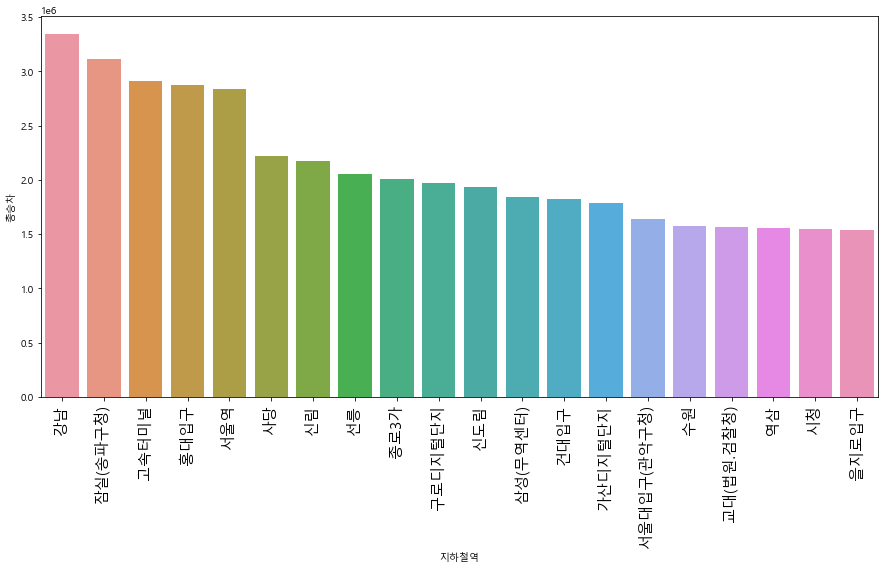

In [76]:
data_sort = subway.sort_values(by = "총승차", ascending = False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x=data_sort.index, y = '총승차', data= data_sort)
plt.xticks(rotation=90, fontsize =15)

plt.show()

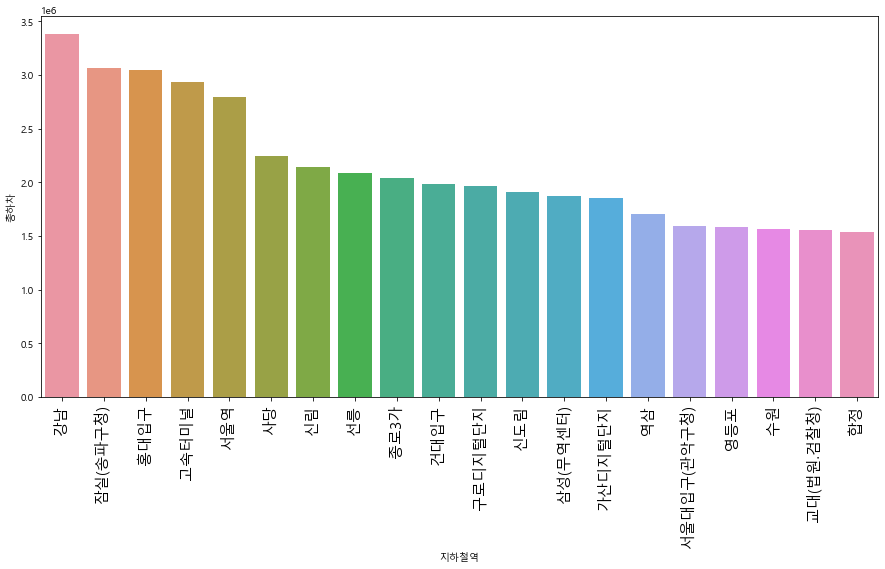

In [77]:
data_sort = subway.sort_values(by = "총하차", ascending = False)[:20]

plt.figure(figsize=(15,7))
sns.barplot(x=data_sort.index, y = '총하차', data= data_sort)
plt.xticks(rotation=90, fontsize =15)

plt.show()

In [87]:
# 23시-0시 사이에 가장 승차인원이 많은 호선은?
pivot_tab = subway_raw.pivot_table(values='승차_23', 
                                   index='호선명', aggfunc='sum')
pivot_tab = pivot_tab.승차_23.sort_values(ascending=False)
pivot_tab

호선명
2호선         1120549
4호선          322241
7호선          307200
3호선          245868
5호선          221958
경부선          212460
6호선          207031
1호선          166580
분당선          165988
9호선          146846
경인선          146327
경원선           64375
8호선           64325
공항철도 1호선      64264
과천선           38851
안산선           37795
9호선2~3단계      33079
일산선           30743
경의선           29685
중앙선           28366
수인선           17868
우이신설선         10886
경춘선            8065
장항선            5150
경강선            4901
Name: 승차_23, dtype: int64

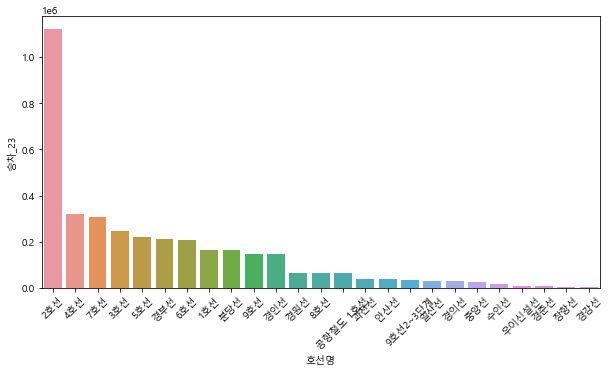

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x=pivot_tab.index, y=pivot_tab)
plt.xticks(rotation=45)
plt.show()

In [83]:
index = pivot_tab.index # 위 그래프와 동일한 index

In [89]:
# 출근시간대에 가장 승차인원이 많은 호선은?
pivot_table = subway_raw.pivot_table(values = ["승차_07","승차_08","승차_09"], index = '호선명' , aggfunc = 'sum')
pivot_table['출근시간_승차'] = pivot_table.sum(axis = 1)
pivot_table

,승차_07,승차_08,승차_09,출근시간_승차
호선명,,,,
1호선,174443,284031,236268,694742
2호선,2447700,3548280,2400304,8396284
3호선,919153,1256142,835574,3010869
4호선,1160952,1386387,924664,3472003
5호선,1615485,2017408,1051218,4684111
6호선,866086,1150894,652608,2669588
7호선,1894102,2380541,1370664,5645307
8호선,486006,685923,383489,1555418
9호선,638630,758119,439786,1836535


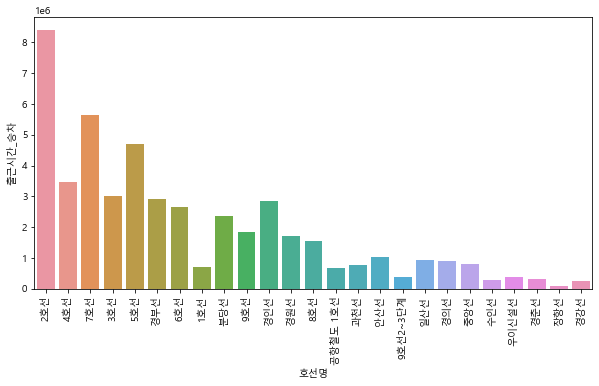

In [98]:
plt.figure(figsize=(10,5))
sns.barplot(x=pivot_table.index, y=pivot_table['출근시간_승차'], order=index) # order을 통해서 순서를 바꿀 수 있음 ! 
plt.xticks(rotation=90)
plt.show()

In [99]:
pivot_tab =pivot_table.reindex(labels= index).출근시간_승차

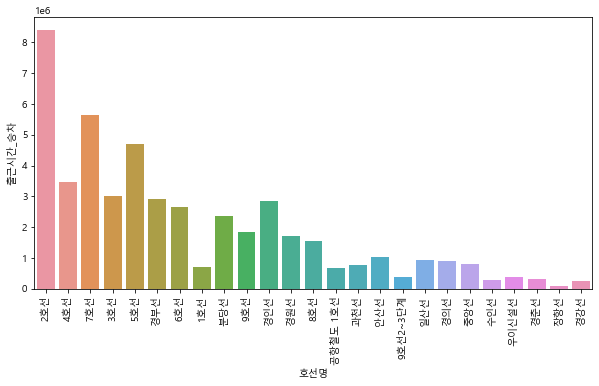

In [100]:
plt.figure(figsize=(10,5))
sns.barplot(x=index, y=pivot_tab)
plt.xticks(rotation=90)
plt.show()

In [101]:
# 유임승하차, 무임승하차 데이터와 결합
subwayfee = pd.read_csv('./data/subwayfee.csv', encoding='cp949')
subwayfee.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687


In [102]:
subway_merge = pd.merge(subway, subwayfee, on="역ID")

In [103]:
# 무임승하차 비율이 가장 높은 역은 어디인가?
subway_merge

,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,승차_08,...,하차_출근시간,총승차,총하차,사용월,호선명,지하철역,유임승차,유임하차,무임승차,무임하차
0,4703,22,8,1392,321,2915,850,7188,1380,8516,...,8905,78436,74980,2019-01,우이신설선,4.19민주묘지,49789,48250,28647,26730
1,1907,200,4,7875,1103,12850,4598,26295,4387,24915,...,25353,210789,197480,2019-01,경원선,가능,152256,140676,58533,56804
2,4107,50,0,13631,1466,25819,8259,78872,22460,85741,...,88848,631153,609020,2019-01,9호선,가양,506045,487879,125108,121141
3,4704,7,2,2372,413,5207,1307,15720,2197,17145,...,10350,122971,120288,2019-01,우이신설선,가오리,77993,73611,44978,46677
4,1265,3,2,2373,256,6259,3365,18493,3182,23943,...,17798,156456,144784,2019-01,경의선,가좌,109237,97211,47219,47573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1952,143,1,10546,1574,23753,6695,59077,11631,63428,...,67415,593121,604439,2019-01,일산선,화정,462731,474664,130390,129775
434,1015,561,2,10532,3889,20509,14354,60949,27498,81574,...,123065,813196,795444,2019-01,중앙선,회기,684067,666710,129129,128734
435,1905,879,6,13639,1865,26033,6524,60318,6571,48129,...,29153,393521,380350,2019-01,경원선,회룡,249439,235179,144082,145171
436,425,41,0,2536,1110,4214,26076,6458,58373,10628,...,345252,903868,955760,2019-01,4호선,회현(남대문시장),705485,758424,198383,197336


In [104]:
subway_merge['no_fee_in_rate'] = (subway_merge.무임승차 / subway_merge.총승차) * 100
data_sort = subway_merge.sort_values(by = 'no_fee_in_rate', ascending = False)[:20]

In [109]:
data_sort.columns

Index(['역ID', '승차_04', '하차_04', '승차_05', '하차_05', '승차_06', '하차_06', '승차_07',
       '하차_07', '승차_08', '하차_08', '승차_09', '하차_09', '승차_10', '하차_10', '승차_11',
       '하차_11', '승차_12', '하차_12', '승차_13', '하차_13', '승차_14', '하차_14', '승차_15',
       '하차_15', '승차_16', '하차_16', '승차_17', '하차_17', '승차_18', '하차_18', '승차_19',
       '하차_19', '승차_20', '하차_20', '승차_21', '하차_21', '승차_22', '하차_22', '승차_23',
       '하차_23', '승차_00', '하차_00', '승차_01', '하차_01', '승차_02', '하차_02', '승차_03',
       '하차_03', '승차_출근시간', '하차_출근시간', '총승차', '총하차', '사용월', '호선명', '지하철역',
       '유임승차', '유임하차', '무임승차', '무임하차', 'no_fee_in_rate'],
      dtype='object')

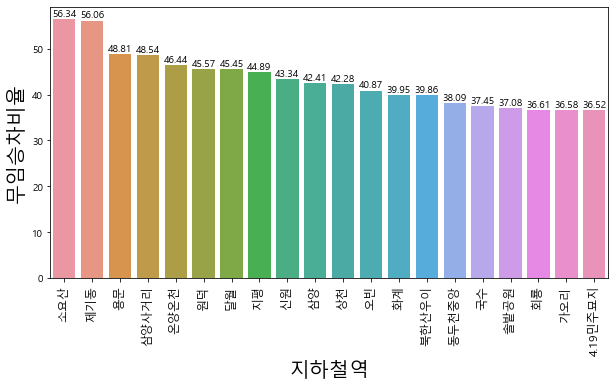

In [105]:
plt.figure(figsize = (10, 5))

ax = sns.barplot(x = data_sort.지하철역, y = data_sort.no_fee_in_rate)

for p in ax.patches: 
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 1), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), 
       textcoords='offset points') 
    
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('지하철역',fontsize=20)
plt.ylabel('무임승차비율', fontsize=20)
plt.show()

In [106]:
subway_merge[subway_merge.무임승차 == subway_merge.무임승차.max()]

,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,승차_08,...,총승차,총하차,사용월,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,no_fee_in_rate
368,157,316,8,4874,2284,8388,8242,22615,18537,34862,...,668111,688824,2019-01,1호선,제기동,293540,288217,374571,400607,56.064187


In [112]:
# 출근시간대 승차인원과 무임승차 비율 간의 관계는 어떠한가?
df = subway_merge[['승차_출근시간','no_fee_in_rate']]
df

,승차_출근시간,no_fee_in_rate
0,21663,36.522770
1,67361,27.768527
2,209410,19.822135
3,44156,36.576103
4,53820,30.180370
...,...,...
433,161397,21.983710
434,192967,15.879198
435,141124,36.613548
436,32275,21.948227


In [111]:
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go

subway_merge.head()

,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,승차_08,...,총승차,총하차,사용월,호선명,지하철역,유임승차,유임하차,무임승차,무임하차,no_fee_in_rate
0,4703,22,8,1392,321,2915,850,7188,1380,8516,...,78436,74980,2019-01,우이신설선,4.19민주묘지,49789,48250,28647,26730,36.522770
1,1907,200,4,7875,1103,12850,4598,26295,4387,24915,...,210789,197480,2019-01,경원선,가능,152256,140676,58533,56804,27.768527
2,4107,50,0,13631,1466,25819,8259,78872,22460,85741,...,631153,609020,2019-01,9호선,가양,506045,487879,125108,121141,19.822135
3,4704,7,2,2372,413,5207,1307,15720,2197,17145,...,122971,120288,2019-01,우이신설선,가오리,77993,73611,44978,46677,36.576103
4,1265,3,2,2373,256,6259,3365,18493,3182,23943,...,156456,144784,2019-01,경의선,가좌,109237,97211,47219,47573,30.180370


In [117]:
px.scatter(data_frame= subway_merge,
           x = '승차_출근시간', 
           y='no_fee_in_rate', 
           color='no_fee_in_rate', 
          hover_data=['지하철역','호선명'])

In [118]:
# 지하철역별로 pivot을 수행 후, 지하철 역을 기준으로 정리했을 때 가장 무임승차 비율이 높은 역은?
subwayfee = pd.pivot_table(subwayfee, index = '지하철역', values = ['유임승차','유임하차','무임승차','무임하차'], aggfunc = 'sum')
subwayfee

,무임승차,무임하차,유임승차,유임하차
지하철역,,,,
4.19민주묘지,28647,26730,49789,48250
가능,58533,56804,152256,140676
가락시장,142334,142907,422615,455098
가산디지털단지,113196,111188,1670941,1744694
가양,125108,121141,506045,487879
...,...,...,...,...
회기,129129,128734,684067,666710
회룡,144082,145171,249439,235179
회현(남대문시장),198383,197336,705485,758424


In [119]:
subway_merge = pd.merge(subwayfee, subway, on="지하철역")
subway_merge.columns

Index(['무임승차', '무임하차', '유임승차', '유임하차', '역ID', '승차_04', '하차_04', '승차_05',
       '하차_05', '승차_06', '하차_06', '승차_07', '하차_07', '승차_08', '하차_08', '승차_09',
       '하차_09', '승차_10', '하차_10', '승차_11', '하차_11', '승차_12', '하차_12', '승차_13',
       '하차_13', '승차_14', '하차_14', '승차_15', '하차_15', '승차_16', '하차_16', '승차_17',
       '하차_17', '승차_18', '하차_18', '승차_19', '하차_19', '승차_20', '하차_20', '승차_21',
       '하차_21', '승차_22', '하차_22', '승차_23', '하차_23', '승차_00', '하차_00', '승차_01',
       '하차_01', '승차_02', '하차_02', '승차_03', '하차_03', '승차_출근시간', '하차_출근시간',
       '총승차', '총하차'],
      dtype='object')

In [120]:
subway_merge['no_fee_in_rate'] = (subway_merge.무임승차 / subway_merge.총승차) * 100
subway_merge[subway_merge.no_fee_in_rate == subway_merge.no_fee_in_rate.max()][['역ID','no_fee_in_rate','무임승차','무임하차','유임승차','유임하차']]

,역ID,no_fee_in_rate,무임승차,무임하차,유임승차,유임하차
지하철역,,,,,,
소요산,1916,56.33869,62372,54630,48337,37020


In [121]:
subwayfee2 = subwayfee.groupby('지하철역').sum()
subwayfee2.head()

,무임승차,무임하차,유임승차,유임하차
지하철역,,,,
4.19민주묘지,28647,26730,49789,48250
가능,58533,56804,152256,140676
가락시장,142334,142907,422615,455098
가산디지털단지,113196,111188,1670941,1744694
가양,125108,121141,506045,487879


In [122]:
subway.reset_index(inplace = True)
subwayfee2.reset_index(inplace = True)

In [123]:
subway_merge2 = pd.merge(subway, subwayfee2, on = '지하철역')
subway_merge2.head()

,지하철역,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,...,승차_03,하차_03,승차_출근시간,하차_출근시간,총승차,총하차,무임승차,무임하차,유임승차,유임하차
0,4.19민주묘지,4703,22,8,1392,321,2915,850,7188,1380,...,0,0,21663,8905,78436,74980,28647,26730,49789,48250
1,가능,1907,200,4,7875,1103,12850,4598,26295,4387,...,0,0,67361,25353,210789,197480,58533,56804,152256,140676
2,가락시장,3158,41,0,5210,2629,11937,11184,31942,22435,...,0,0,105614,138382,564949,598005,142334,142907,422615,455098
3,가산디지털단지,4450,1772,10,15938,6972,17546,31710,35519,146273,...,0,0,108042,1087009,1784137,1855882,113196,111188,1670941,1744694
4,가양,4107,50,0,13631,1466,25819,8259,78872,22460,...,0,0,209410,88848,631153,609020,125108,121141,506045,487879


In [124]:
subway_merge2['무임승차비율'] = subway_merge2.무임승차 / (subway_merge2.무임승차 + subway_merge2.유임승차)
subway_merge2['무임하차비율'] = subway_merge2.무임하차 / (subway_merge2.무임하차 + subway_merge2.유임하차)

In [125]:
subway_merge2['유임승차비율'] = subway_merge2.유임승차 / (subway_merge2.무임승차 + subway_merge2.유임승차)
subway_merge2['유임하차비율'] = subway_merge2.유임하차 / (subway_merge2.무임하차 + subway_merge2.유임하차)

In [126]:
subway_merge2[subway_merge2.무임승차비율 == subway_merge2.무임승차비율.max()]

,지하철역,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,...,총승차,총하차,무임승차,무임하차,유임승차,유임하차,무임승차비율,무임하차비율,유임승차비율,유임하차비율
268,소요산,1916,106,0,894,3,1162,1818,5942,2239,...,110709,91650,62372,54630,48337,37020,0.563387,0.596072,0.436613,0.403928


In [127]:
subway_merge2[subway_merge2.무임승차 == subway_merge2.무임승차.max()]

,지하철역,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,...,총승차,총하차,무임승차,무임하차,유임승차,유임하차,무임승차비율,무임하차비율,유임승차비율,유임하차비율
429,종로3가,3007,153,5,7789,3796,7614,24151,11664,56059,...,2005763,2036063,575963,565877,1429800,1470186,0.287154,0.277927,0.712846,0.722073


In [128]:
subway_merge2[subway_merge2.무임하차비율 == subway_merge2.무임하차비율.max()]

,지하철역,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,...,총승차,총하차,무임승차,무임하차,유임승차,유임하차,무임승차비율,무임하차비율,유임승차비율,유임하차비율
268,소요산,1916,106,0,894,3,1162,1818,5942,2239,...,110709,91650,62372,54630,48337,37020,0.563387,0.596072,0.436613,0.403928


In [129]:
subway_merge2[subway_merge2.무임하차 == subway_merge2.무임하차.max()]

,지하철역,역ID,승차_04,하차_04,승차_05,하차_05,승차_06,하차_06,승차_07,하차_07,...,총승차,총하차,무임승차,무임하차,유임승차,유임하차,무임승차비율,무임하차비율,유임승차비율,유임하차비율
429,종로3가,3007,153,5,7789,3796,7614,24151,11664,56059,...,2005763,2036063,575963,565877,1429800,1470186,0.287154,0.277927,0.712846,0.722073


In [130]:
px.scatter(subway_merge2, 
           x= '승차_출근시간', 
           y ='무임승차비율',
           size = '무임승차',
           color = '총승차',
           hover_data = ['지하철역'])

#그래프에 최대한 다양한 정보를 넣을 수록 좋다 ! 

## Example 3 : 셀프주유소는 정말 저렴한가?

In [134]:
# 구별 주유 가격에 대한 데이터 정리
import pandas as pd
from glob import glob

stations_files = glob('./data/주유소/지역_위치별*xls')
stations_files

['./data/주유소\\지역_위치별(주유소) (1).xls',
 './data/주유소\\지역_위치별(주유소) (10).xls',
 './data/주유소\\지역_위치별(주유소) (11).xls',
 './data/주유소\\지역_위치별(주유소) (12).xls',
 './data/주유소\\지역_위치별(주유소) (13).xls',
 './data/주유소\\지역_위치별(주유소) (14).xls',
 './data/주유소\\지역_위치별(주유소) (15).xls',
 './data/주유소\\지역_위치별(주유소) (16).xls',
 './data/주유소\\지역_위치별(주유소) (17).xls',
 './data/주유소\\지역_위치별(주유소) (18).xls',
 './data/주유소\\지역_위치별(주유소) (19).xls',
 './data/주유소\\지역_위치별(주유소) (2).xls',
 './data/주유소\\지역_위치별(주유소) (20).xls',
 './data/주유소\\지역_위치별(주유소) (21).xls',
 './data/주유소\\지역_위치별(주유소) (22).xls',
 './data/주유소\\지역_위치별(주유소) (23).xls',
 './data/주유소\\지역_위치별(주유소) (24).xls',
 './data/주유소\\지역_위치별(주유소) (3).xls',
 './data/주유소\\지역_위치별(주유소) (4).xls',
 './data/주유소\\지역_위치별(주유소) (5).xls',
 './data/주유소\\지역_위치별(주유소) (6).xls',
 './data/주유소\\지역_위치별(주유소) (7).xls',
 './data/주유소\\지역_위치별(주유소) (8).xls',
 './data/주유소\\지역_위치별(주유소) (9).xls',
 './data/주유소\\지역_위치별(주유소).xls']

In [135]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

In [136]:
station_raw = pd.concat(tmp_raw) 

In [137]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,1554,1354,997
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1556,1355,-
2,서울특별시,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,1855,1559,1349,1000
3,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,-,1578,1388,1100
4,서울특별시,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),GS칼텍스,02-479-3838,Y,-,1588,1388,-


In [138]:
# 필요한 변수만 선택
stations = pd.DataFrame({
    'Oil_store' : station_raw['상호'],
    '주소' : station_raw['주소'],
    '가격' : station_raw['휘발유'],
    '셀프' : station_raw['셀프여부'],
    '상표' : station_raw['상표'],
})

In [139]:
stations.head()

,Oil_store,주소,가격,셀프,상표
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스


In [140]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588,Y,GS칼텍스,강동구


In [141]:
stations = stations[stations['가격'] != '-']

In [142]:
# 가격 변수를 숫자 형태로 변환
stations.가격 = [float(value) for value in stations['가격']]

In [143]:
# index를 오름차순으로 재정렬
stations.reset_index(inplace=True)
stations.drop(columns = 'index', axis = 1 , inplace = True)

In [144]:
# 주유 가격 비교
stations.drop(index = stations[stations.셀프 == 0].index, inplace = True)
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,오렌지주유소,서울 강동구 성안로 102 (성내동),1554.0,N,SK에너지,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1556.0,N,현대오일뱅크,강동구
2,GS칼텍스㈜직영 신월주유소,서울 강동구 양재대로 1323 (성내동),1559.0,N,GS칼텍스,강동구
3,광성주유소,서울 강동구 올림픽로 673 (천호동),1578.0,N,S-OIL,강동구
4,(주)소모에너지엔테크놀러지성내주유소,서울 강동구 올림픽로 578 (성내동),1588.0,Y,GS칼텍스,강동구


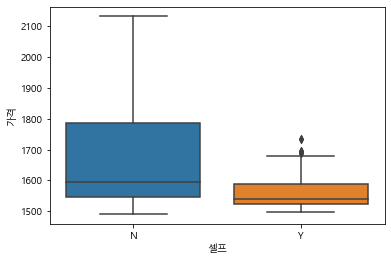

In [145]:
sns.boxplot(x='셀프',y='가격', data = stations)
plt.show()
# 셀프가 아닌 경우 Variance가 상당히 큼
# 어떤 경우 셀프가 아닌 주유소가 셀프 주유소보다 싼 경우도 있을 수 있음

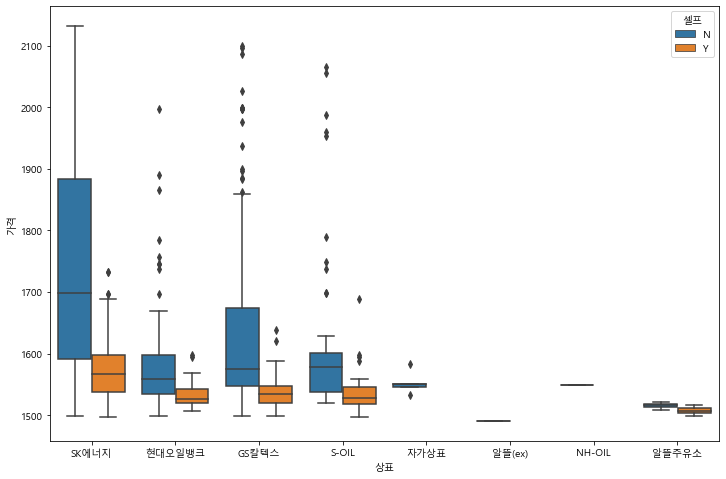

In [146]:
# 상표와 셀프 여부에 따른 가격 비교 Boxplot
plt.figure(figsize = (12,8))
sns.boxplot(x='상표',y='가격', hue ='셀프',data = stations)
plt.show()

In [147]:
# 서울시 구별 주유 가격 확인하기
import json
import folium
import googlemaps
# 가장 비싼 주유소
stations.sort_values(by ='가격', ascending =False).head(10)

,Oil_store,주소,가격,셀프,상표,구
325,서남주유소,서울 중구 통일로 30 (봉래동1가),2132.0,N,SK에너지,중구
324,장충주유소,서울 중구 장충단로 202 (장충동1가),2130.0,N,SK에너지,중구
124,양재주유소,서울 서초구 바우뫼로 178 (양재동),2128.0,N,SK에너지,서초구
532,뉴서울(강남),서울 강남구 언주로 716 (논현동),2120.0,N,SK에너지,강남구
531,오천주유소,서울 강남구 봉은사로 503 (삼성동),2107.0,N,SK에너지,강남구
313,재동주유소,서울특별시 종로구 율곡로 58 (경운동),2106.0,N,SK에너지,종로구
285,청파주유소,서울특별시 용산구 청파로 311 (청파동1가),2106.0,N,SK에너지,용산구
284,갈월동주유소,서울특별시 용산구 한강대로 322 (갈월동),2106.0,N,SK에너지,용산구
283,강변주유소,서울특별시 용산구 원효로 9 (청암동),2106.0,N,SK에너지,용산구
323,통일주유소,서울 중구 동호로 296 (장충동2가),2106.0,N,SK에너지,중구


In [148]:
# 가장 싼 주유소
stations.sort_values(by ='가격', ascending =True).head(10)

,Oil_store,주소,가격,셀프,상표,구
83,만남의광장주유소,서울 서초구 양재대로12길 73-71 (원지동),1490.0,N,알뜰(ex),서초구
344,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1497.0,Y,SK에너지,강서구
451,태릉솔밭주유소,서울특별시 노원구 노원로 49 (공릉동),1497.0,Y,S-OIL,노원구
258,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),1498.0,Y,GS칼텍스,강북구
227,(주)강서오일,서울 영등포구 도신로 151 (도림동),1499.0,N,현대오일뱅크,영등포구
225,도림주유소,서울 영등포구 도림로 343 (도림동),1499.0,Y,알뜰주유소,영등포구
226,(주)대청에너지 대청주유소,서울 영등포구 가마산로 328 (대림동),1499.0,N,GS칼텍스,영등포구
415,풀페이주유소,서울특별시 구로구 경인로 41 (온수동),1499.0,N,SK에너지,구로구
326,신일셀프주유소,서울 중랑구 상봉로 58 (망우동),1499.0,Y,SK에너지,중랑구
40,서경주유소,서울 동작구 대림로 46 (신대방동),1499.0,N,현대오일뱅크,동작구


In [149]:
# 구별 평균 주유가격 구하기
import numpy as np
gu_data = pd.pivot_table(stations, index = '구', values = '가격', aggfunc=np.mean)
gu_data

,가격
구,
강남구,1791.000000
강동구,1656.722222
강북구,1534.333333
강서구,1576.428571
관악구,1603.055556
광진구,1569.333333
구로구,1597.227273
금천구,1616.642857
노원구,1606.000000


In [150]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [151]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [152]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

folium.Choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id').add_to(map)
map